In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/hp/Documents/ML Practice/AQI Delhi/Data/Real-Data/Real_Combine.csv')
df=df.dropna()

In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y,cv=5)

In [34]:
score.mean()

0.7366227058454093

In [35]:
predict = regressor.predict(x_test)

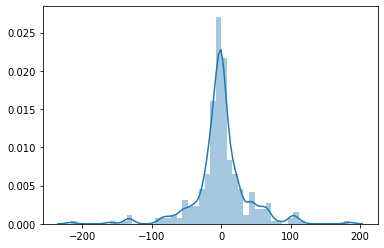

In [36]:
sns.distplot(y_test-predict)

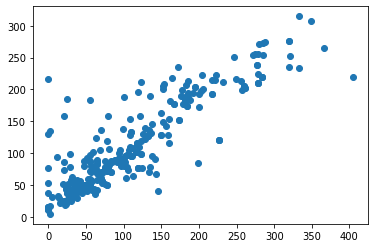

In [37]:
plt.scatter(y_test,predict)

In [38]:
import pickle
file = open('final_model.pkl','wb')
pickle.dump(regressor,file)

In [41]:
regressor.predict([[21.7,30.0,12.2,1014.5,52.0,1.1,6.3,16.5]])

array([233.58166667])

In [42]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
